**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [62]:
import pandas as pd
import numpy as np
import sklearn
import math 
import operator
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [36]:
def dataimport(normalize,append_col_X_1,test_samples):
    df = pd.read_csv('diamonds.csv')
    cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
    clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
    color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
    df['cut'] = df['cut'].map(cut_dict)
    df['clarity'] = df['clarity'].map(clarity_dict)
    df['color'] = df['color'].map(color_dict)
    df = sklearn.utils.shuffle(df, random_state = 42)
    X = df.drop(['price'], axis = 1).values
    if normalize==1:
        X = (X - X.mean()) / X.std()
    if append_col_X_1==1:
        X = np.c_[np.ones(X.shape[0]), X] 
    y = df['price'].values
    test_size = test_samples
    X_train,y_train,X_test,y_test = X[: -test_size],y[: -test_size],X[-test_size :],y[-test_size :]
    return X_train,y_train,X_test,y_test



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [37]:
class KNearestNeighbor(object):
    X_train=[]
    Y_train=[]
    def train(self,X_train, Y_train):
        self.X_train=X_train
        self.Y_train=Y_train
    def compute_distances_no_loops(self,X_Test):
        f = -2 * np.dot(X_Test, self.X_train.T)
        xsq = np.power(X_Test, 2).sum(axis=1).reshape((-1, 1))
        ysq = np.power(self.X_train, 2).sum(axis=1)
        return (xsq + f + ysq)
    def manhattan(self,X_test):
        distances=np.abs(X_test[:,None] - self.X_train).sum(-1)
        return distances
    def predict_labels(self,dists, k):
        y_test_pred = []
        m=len(dists)
        for i in range(0,m):
            List1 = []
            n=len(dists[i])
            for j in range(0,n):
                List1.append(dists[i][j])
            List1=np.array(List1)
            List1=Y_train[np.argpartition(List1,k,axis=0)[0:k]]
            y_test_pred.append(np.average(List1))
        return y_test_pred  
    
    def __init__(self):
        pass


In [38]:
X_train,Y_train,X_test,Y_test=dataimport(0,0,1000)
obj=KNearestNeighbor()
obj.train(X_train,Y_train)
distances=obj.compute_distances_no_loops(X_test)
Y_pred=obj.predict_labels(distances,7)
print("Actual price ->  Predicted Price")
for i in range(len(Y_pred)):
    print(Y_test[i],"  ->  ",Y_pred[i])

Actual price ->  Predicted Price
3787   ->   4249.0
10623   ->   10154.0
4796   ->   4334.0
11365   ->   11008.714285714286
11650   ->   9638.57142857143
6512   ->   7882.0
1814   ->   1746.5714285714287
15837   ->   15524.285714285714
1364   ->   2136.714285714286
2404   ->   2547.0
648   ->   660.5714285714286
7677   ->   7195.0
6750   ->   5783.0
1061   ->   924.0
1094   ->   943.1428571428571
603   ->   774.4285714285714
11090   ->   10351.0
949   ->   936.2857142857143
988   ->   958.4285714285714
526   ->   748.5714285714286
10038   ->   7550.428571428572
9604   ->   9365.57142857143
12089   ->   11671.714285714286
4986   ->   5225.857142857143
680   ->   758.1428571428571
4729   ->   5196.714285714285
2167   ->   2182.8571428571427
3560   ->   3615.0
828   ->   722.7142857142857
923   ->   873.1428571428571
7421   ->   7268.428571428572
1207   ->   2258.285714285714
1336   ->   1710.857142857143
1668   ->   1678.857142857143
12210   ->   15527.285714285714
10438   ->   8711.4285

5311   ->   4835.142857142857
2658   ->   2458.8571428571427
1571   ->   1376.0
811   ->   1116.7142857142858
2549   ->   2618.714285714286
3730   ->   4605.714285714285
9996   ->   7690.142857142857
15808   ->   15896.142857142857
1035   ->   823.8571428571429
2312   ->   2162.1428571428573
9659   ->   12949.57142857143
1793   ->   1955.0
579   ->   658.0
489   ->   627.5714285714286
12833   ->   12946.857142857143
2870   ->   2530.1428571428573
526   ->   626.5714285714286
530   ->   530.8571428571429
984   ->   1195.4285714285713
678   ->   655.8571428571429
16513   ->   13495.142857142857
2170   ->   1989.857142857143
18757   ->   15628.285714285714
8556   ->   8506.0
3016   ->   4183.0
11711   ->   12253.42857142857
12071   ->   13220.0
1587   ->   1872.0
2558   ->   2710.1428571428573
7127   ->   7772.428571428572
1073   ->   1122.4285714285713
1785   ->   1719.0
2326   ->   2755.1428571428573
2589   ->   3176.714285714286
3369   ->   5289.714285714285
544   ->   604.142857142857

1. b) Do we need to normalise data? [If so Does it make any difference?].


In [39]:
X_train_N,Y_train_N,X_test_N,Y_test_N=dataimport(1,0,1000)
obj=KNearestNeighbor()
obj.train(X_train_N,Y_train_N)
distances_N=obj.compute_distances_no_loops(X_test_N)
Y_pred_N=obj.predict_labels(distances_N,7)
print("R2 Score ->",sklearn.metrics.r2_score(Y_pred_N,Y_test_N))
print("Even when we normalized the data, R2 score remains the same as error of normalized data will change relatively according to error of unnormalized data")

R2 Score -> 0.9519526183422224
Even when we normalized the data, R2 score remains the same as error of normalized data will change relatively according to error of unnormalized data


2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [40]:
X_train,Y_train,X_test,Y_test=dataimport(0,0,1000)
obj=KNearestNeighbor()
obj.train(X_train,Y_train)
distancesE=obj.compute_distances_no_loops(X_test)
distancesM=obj.manhattan(X_test)
Y_pred_E=obj.predict_labels(distancesE,7)
Y_pred_M=obj.predict_labels(distancesM,7)
print("R2 Score using Euclidean distance ->",sklearn.metrics.r2_score(Y_pred_E,Y_test))
print("R2 Score using manhattan distance->",sklearn.metrics.r2_score(Y_pred_M,Y_test))


R2 Score using Euclidean distance -> 0.9519526614773931
R2 Score using manhattan distance-> 0.9691402804467623


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [27]:
k=7
X_train,Y_train,X_test,Y_test=dataimport(0,0,1000)
obj=KNearestNeighbor()
obj.train(X_train,Y_train)
distancesE=obj.compute_distances_no_loops(X_test)
Y_pred_E=obj.predict_labels(distancesE,k)
MSE=sklearn.metrics.mean_squared_error(Y_pred_E,Y_test)
MAE=sklearn.metrics.mean_absolute_error(Y_pred_E,Y_test)
R2S=sklearn.metrics.r2_score(Y_pred_E,Y_test)
table = [[MSE,MAE,R2S]]
table = pd.DataFrame(np.array(table), columns = ['MSE', 'MAE', 'R2'], index =[k])
table

,MSE,MAE,R2
7,766538.679714,482.560571,0.951953


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

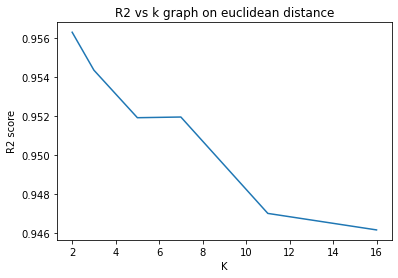

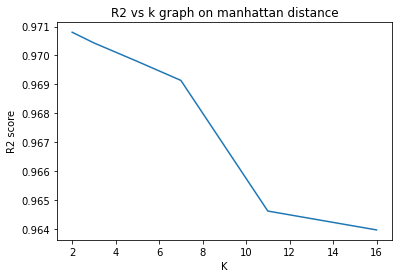

In [18]:
X_train,Y_train,X_test,Y_test=dataimport(0,0,1000)
obj=KNearestNeighbor()
obj.train(X_train,Y_train)
distancesE=obj.compute_distances_no_loops(X_test)
distancesM=obj.manhattan(X_test)
#Y_pred=obj.predict_labels(distances,7)
arr=[2,3,5,7,11,16]
err1=[]
err2=[]
for k in arr:
    Y_predE=obj.predict_labels(distancesE,k)
    Y_predM=obj.predict_labels(distancesM,k)
    err1.append(sklearn.metrics.r2_score(Y_predE,Y_test))
    err2.append(sklearn.metrics.r2_score(Y_predM,Y_test))

plt.plot(arr, err1)  
plt.ylabel('R2 score') 
plt.xlabel('K') 
plt.title('R2 vs k graph on euclidean distance') 
plt.show() 
plt.plot(arr, err2)  
plt.ylabel('R2 score') 
plt.xlabel('K') 
plt.title('R2 vs k graph on manhattan distance') 
plt.show() 


4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

ANSWER - R2 square score in not same as initially when we increased the value of k it also increased proportionally. But when value of k reach 7 then it started decreasing with increase in value of k.
We can use k cross fold validation to get the best value of k

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [65]:
clf = KNeighborsRegressor(n_neighbors = 7,  weights = 'distance', p=2)
clf.fit(X_train, Y_train)
Y_pred_KNN=clf.predict(X_test)
R2_KNN=clf.score(X_test, Y_test)
print(R2_sk)

0.981126255641429


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [29]:
table = [[R2S,R2_sk]]
table = pd.DataFrame(np.array(table), columns = ['R2 using my algo', 'R2 using sklearn'], index =[k])
table

,R2 using my algo,R2 using sklearn
7,0.951953,0.964555


When k=7, our model gave R2 score of 0.95 where as KNN built using sklearn gave R2 score of 0.96. so sk learn is better. 
Also this model works a little slower even when i have implemented using no loops method. SKLearn is comparatively faster

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [42]:
X_train,Y_train,X_test,Y_test=dataimport(0,0,1000)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.01, random_state=42)
obj=KNearestNeighbor()
obj.train(X_train,Y_train)
distancesE=obj.compute_distances_no_loops(X_valid)
bestacc,bestk=0,0
for i in range(2,20):
    Y_pred_E=obj.predict_labels(distancesE,i)
    MSE=sklearn.metrics.r2_score(Y_pred_E,Y_valid)
    if MSE>bestacc:
        bestacc=MSE
        bestk=i
print("Best K is ",bestk)        
print("Best accuracy is ",bestacc)
print("Now testing on test data")
distancesE=obj.compute_distances_no_loops(X_test)
Y_pred_E=obj.predict_labels(distancesE,bestk)
print("Accuracy on test set =",sklearn.metrics.r2_score(Y_pred_E,Y_test))
Acc_using_KNN_regression=sklearn.metrics.r2_score(Y_pred_E,Y_test)

Best K is  5
Best accuracy is  0.9592169651921985
Now testing on test data
Accuracy on test set = 0.9510945765220653


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [51]:
def dataimport2(normalize,append_col_X_1,test_samples):
    df = pd.read_csv('diamonds.csv')
    cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
    clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
    color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
    df['cut'] = df['cut'].map(cut_dict)
    df['clarity'] = df['clarity'].map(clarity_dict)
    df['color'] = df['color'].map(color_dict)
    df = sklearn.utils.shuffle(df, random_state = 42)
    X = df.drop(['price','table','depth'], axis = 1).values
    if normalize==1:
        X = (X - X.mean()) / X.std()
    if append_col_X_1==1:
        X = np.c_[np.ones(X.shape[0]), X] 
    y = df['price'].values
    test_size = test_samples
    X_train = X[: -test_size]  
    y_train = y[: -test_size]
    X_test = X[-test_size :]
    y_test =  y[-test_size :]
    return df,X_train,y_train,X_test,y_test

In [57]:
class LinearRegression1(object):
    X_train=[]
    Y_train=[]
    def train(self,X_train, Y_train):#toppa done
        self.X_train=X_train
        self.Y_train=Y_train
        
    def cost_function(self, W): 
        m = self.Y_train.shape[0]
        yh=np.dot(self.X_train, W.T)
        error = yh - self.Y_train
        cost = 1/(2*m) * np.dot(error.T, error)
        return cost, error

    def gradient_descent(self,alpha, iters):
        W = np.zeros(self.X_train.shape[1])
        cost_array = np.zeros(iters)
        m = self.Y_train.size
        for i in range(iters):
            cost, error = self.cost_function(W)
            W = W - (alpha * (1/m) * np.dot(self.X_train.T, error))
            cost_array[i] = cost
        return W, cost_array

    def plotChart(self,iterations, cost_num):
        fig, ax = plt.subplots()
        ax.plot(np.arange(iterations), cost_num, 'r')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Error vs Iterations')
        plt.style.use('fivethirtyeight')
        plt.show()
    
    def predictResult(self,X_test,Y_test,W):
        YPredic = np.dot(X_test,W.T)
        return sklearn.metrics.r2_score(Y_test,YPredic)

    def __init__(self):
        pass

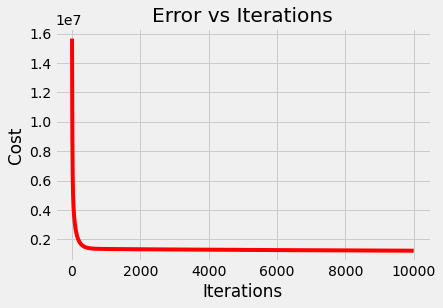

With final theta values of [2472.79928542 2185.74316621  210.62225995  500.78366655 1048.84296945
 4412.70188226 1381.52806588  483.40192929], cost error is 1230034.9034827072
R2 score ->  0.8519681372858825


In [58]:
append_1=1
df,X_train,Y_train,X_test,Y_test=dataimport2(1,append_1,1000)
obj=LinearRegression1()
obj.train(X_train,Y_train)
alpha=0.01
iterations = 10000
W, cost_num = obj.gradient_descent(alpha, iterations)
obj.plotChart(iterations, cost_num)
final_cost, _ = obj.cost_function(W)
print('With final theta values of {0}, cost error is {1}'.format(W, final_cost))
R2_LR_mine=obj.predictResult(X_test,Y_test,W)
print("R2 score -> ",R2_LR_mine)

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

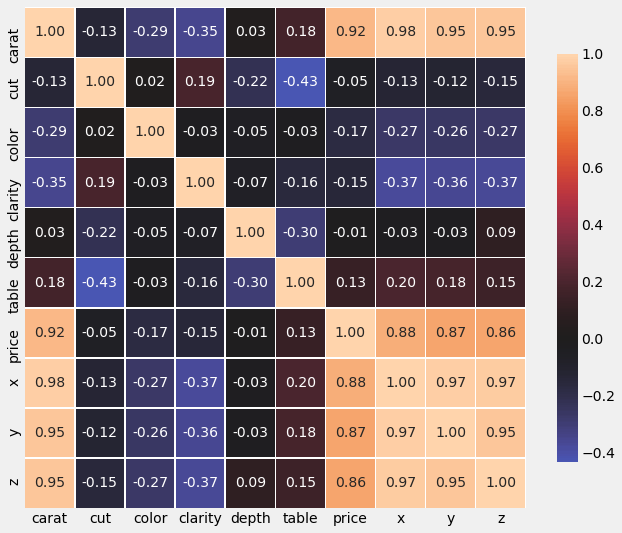

I used Carat,x,y,z features for training data as they are highly corelated with price


In [60]:
def correlation_heatmap(df):
    correlations = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

print("I used Carat,x,y,z features for training data as they are highly corelated with price")

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [63]:
df,X_train,Y_train,X_test,Y_test=dataimport2(1,0,1000)
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred_LR=reg.predict(X_test)
R2S1=sklearn.metrics.r2_score(Y_pred_LR,Y_test)
print(R2S1)

0.886434503304478


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [24]:
X_train,Y_train,X_test,Y_test=dataimport(1,0,1000)
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred=reg.predict(X_test)
R2S2=sklearn.metrics.r2_score(Y_pred,Y_test)
print(R2S2)
table = [[R2S,R2S2]]
table = pd.DataFrame(np.array(table), columns = ['R2 score after feature dropping', 'R2 score before feature dropping'], index =[k])
table

0.88753056716292


,R2 score after feature dropping,R2 score before feature dropping
16,0.886435,0.887531


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


In [89]:
table = [[R2_KNN,R2S1]]
table = pd.DataFrame(np.array(table), columns = ['KNN regression', 'Linear Regression'], index =[1])
print(table)
print("Linear Regression is better")

   KNN regression  Linear Regression
1        0.981126           0.886435
Linear Regression is better


2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


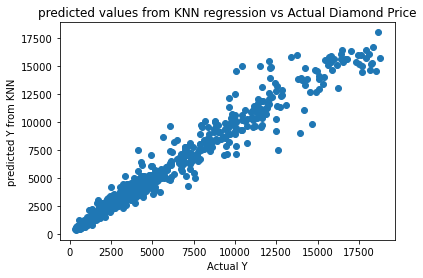

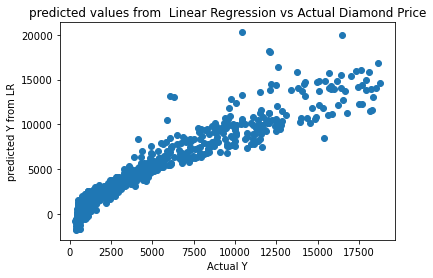

In [27]:
plt.scatter(Y_test,Y_pred_KNN)
plt.ylabel('predicted Y from KNN')
plt.xlabel('Actual Y') 
plt.title('predicted values from KNN regression vs Actual Diamond Price') 
plt.show() 
plt.scatter(Y_test, Y_pred_LR)
plt.ylabel('predicted Y from LR')
plt.xlabel('Actual Y') 
plt.title('predicted values from  Linear Regression vs Actual Diamond Price') 
plt.show() 

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [79]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os

from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [81]:
# Download the dataset
#!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
#!rm cifar-10-python.tar.gz

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [82]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

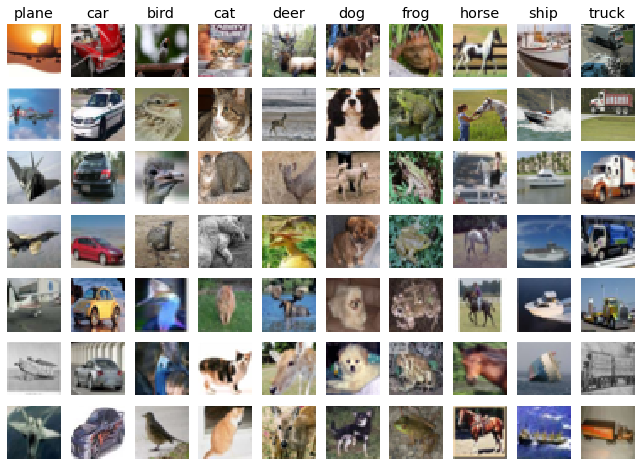

In [83]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [84]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [85]:
import math
import operator
import statistics
class KNearestNeighbor(object):
    X_train=[]
    Y_train=[]
    def compute_distances_no_loops(self,X_test):
        B2 = np.sum(X_test**2, axis=1)
        A2 = np.sum(self.X_train**2, axis=1)
        distances = np.zeros( ( len(X_test),len(self.X_train) ))
        AB = np.dot(X_test, self.X_train.T)
        distances = -2 * AB + A2  + B2[:, np.newaxis]
        return distances
    
    def compute_distances_two_loops(self,X_test):
        distances=np.zeros(( len(X_test),len(self.X_train) ))
        m=len(X_test)
        for i in range(0,m):
            n=len(self.X_train)
            for j in range(0,n):
                col1=X_test[i].T
                col2=self.X_train[j].T
                yh=col1-col2
                yh=np.dot(yh.T,yh)
                yh=math.sqrt(np.sum(yh))
                distances[i][j]=yh
        return distances
    def compute_distances_one_loops(self,X_test):
        distances = np.zeros(( len(X_test),len(self.X_train)))
        m=len(X_test)
        for i in range(0,m):
            yh=(self.X_train - X_test[i,:])**2
            distances[i,:] = np.sum(yh, axis=1)
        return distances
            
        
    def train(self,X_train, Y_train):
        self.X_train,self.Y_train=X_train,Y_train
                
    def predict_labels(self,dists, k):
        y_test_pred = []
        m=len(dists)
        for i in range(0,m):
            List1 = []
            n=len(dists[i])
            for j in range(0,n):
                List1.append([dists[i][j],self.Y_train[j]])
            List1.sort(key = operator.itemgetter(*[0]))
            y=[]
            for p in range(k):
                y.append(List1[p][1])
            y_test_pred.append(statistics.mode(y))
        return y_test_pred  
    
    def __init__(self):
        pass

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [86]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [87]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [9]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, 1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [10]:
# Use this cell to compute accuracies for k = 3, 5, 7
arr=[3, 5, 7]
for k in arr:
    y_test_pred = classifier.predict_labels(dists,k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 140 / 500 correct => accuracy: 0.280000
Got 145 / 500 correct => accuracy: 0.290000
Got 146 / 500 correct => accuracy: 0.292000


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [11]:
dists = classifier.compute_distances_one_loops(X_test)
y_test_pred = classifier.predict_labels(dists,1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
dists = classifier.compute_distances_no_loops(X_test)
y_test_pred = classifier.predict_labels(dists,1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000
Got 137 / 500 correct => accuracy: 0.274000


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [12]:
import time
timeList = []
arr=[1,3,5,7]
starttime=time.time()
dists = classifier.compute_distances_two_loops(X_test)
for k in arr:
    y_test_pred = classifier.predict_labels(dists,k)
endtime=time.time()
timeList.append(endtime-starttime)    
starttime=time.time()
dists = classifier.compute_distances_one_loops(X_test)
for k in arr:
    y_test_pred = classifier.predict_labels(dists,k)
endtime=time.time()
timeList.append(endtime-starttime)    
starttime=time.time()
dists = classifier.compute_distances_no_loops(X_test)
for k in arr:
    y_test_pred = classifier.predict_labels(dists,k)
endtime=time.time()
timeList.append(endtime-starttime)    
print(timeList)

[53.83771324157715, 135.76321935653687, 32.63037991523743]


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [90]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',header=None, index_col=['ID'], names = headers)
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [91]:
import sys
keys=data.columns.tolist()
data_main=(data.to_numpy()).astype(np.float)
class New_node(object):
    attribute=1
    value=1
    left=1
    right=1
    def __init__(self,Attribute,Value,Left,Right):
        self.attribute,self.value,self.left,self.right=Attribute,Value,Left,Right
class Leaf(object):
    benign,malignant,b,m=[],[],1,1
    def __init__(self,Y):
        self.benign = np.where(Y == 2)
        length_benign=len(self.benign[0])
        self.malignant = np.where(Y == 4)
        length_malignant=len(self.malignant[0])
        self.b=(length_benign/len(Y))*100
        self.m=(length_malignant/len(Y))*100
        self.predict = 2 if (self.b>self.m) else 4
        
class DTree(object):
    
    layer=0
    
    def misclassification(self,X,Y):
        benign, malignant = np.where(Y == 2), np.where(Y == 4)
        p = len(benign[0])/len(Y)
        return min(p,1-p)
    
    def __init__(self):
        pass
    
    def build(self,X,Y):
        self.layer += 1
        gain, question = self.best_fit(X,Y)      
        if (self.layer <= 5):
            left_tree, right_tree = self.divide_data(question,X)
            left_branch, right_branch = self.build(X[left_tree],Y[left_tree]), self.build(X[right_tree],Y[right_tree])
            return New_node(question[0],question[1],left_branch,right_branch)
        else:
            return Leaf(Y)
    
    def weighted_impurity(self,s1,w1,s2,w2):
        imp1 = s1*(w1/(w1+w1))
        imp2 = s2*(w2/(w1+w1))
        imp = imp1+ imp2
        return imp
    
    def gini_index(self,X,Y):
        benign, malignant = np.where(Y == 2), np.where(Y == 4)
        return 2*len(benign[0])/len(Y)*(1-(len(benign[0])/len(Y)))
    
    def entropy(self,X,Y):
        benign, malignant = np.where(Y == 2), np.where(Y == 4)
        p=len(benign[0])/len(Y)
        ent = (1-p)*(math.log(1-p)) if (p==0) else p*(math.log(p)) if (1-p==0) else p*(math.log(p))+(1-p)*(math.log(1-p))
        return ent 
        
    def divide_data(self,question,X):
        i = question[0]
        j = question[1]
        col = X[:,i]
        left, right = np.where(col <= j), np.where(col > j)
        return left,right
    
    def build_tree(self,X,Y,er):  
        gain, question = self.best_fit(X,Y,er)
        if (gain > 0):
            left_tree, right_tree = self.divide_data(question,X)
            left_branch, right_branch = self.build_tree(X[left_tree],Y[left_tree],er), self.build_tree(X[right_tree],Y[right_tree],er)
            return New_node(question[0],question[1],left_branch,right_branch)
        else:
             return Leaf(Y)
    
    def best_fit(self,X,Y,er):

        if er=="gini":
            total_impurity=self.gini_index(X,Y)                    #measuring impurity for changing the impurity
        elif er=="miscalssification":
            total_impurity=self.misclassification(X,Y) 
        else:
            total_impurity=self.entropy(X,Y)            
        best_value, val_mean = 0, 0
        weight = sys.maxsize
        for j in range(X.shape[1]):
            col, sort_col = X[:,j], np.sort(X[:,j])
            for i in range(len(sort_col)-1):
                mean_attr=(sort_col[i]+sort_col[i+1])/2
                left, right = np.where(col <= mean_attr), np.where(col > mean_attr)
                left_len=len(left[0])
                right_len=len(right[0])
                if(left_len>0 and right_len>0):
                    if er=="gini":
                        left_impurity,right_impurity=self.gini_index(X[left],Y[left]),self.gini_index(X[right],Y[right])                    #measuring impurity 
                                #measuring impurity
                    elif er=="miscalssification":
                        left_impurity,right_impurity=self.misclassification(X[left],Y[left]),self.misclassification(X[right],Y[right])                     #measuring impurity 
                        
                    else:
                        left_impurity,right_impurity=self.entropy(X[left],Y[left]),self.entropy(X[right],Y[right])                    #measuring impurity 
                        
                    
                    w = self.weighted_impurity(left_impurity,left_len,right_impurity,right_len)
                    if (w < weight):
                        weight, best_value, val_mean = w, j, mean_attr
        return (total_impurity-weight),[best_value,val_mean]

    
def classification(node,X):
    return (node.predict if (isinstance(node,Leaf)) else classification(node.left,X) if(X[node.attribute]<=(node.value)) else classification(node.right,X))   
def acc(list1,list2):
    res=0
    for i in range(len(list1)):
        if list1[i]==list2[i]:
            res=res+1
    return res/len(list1)
def predictval(model,X_test,model_type):
    list1=[]
    if model_type==1:
        for i in range(len(X_test)):
            list1.append(model.predict([X_test[i]]))
    else:
        for i in range(X_test.shape[0]):
            list1.append(classification(root,X_test[i]))
        
    return list1
def tree_structure(node,file,spacing=""):
    TB="TRUE BRANCH:"
    FB="FALSE BRANCH:"
    if isinstance(node,Leaf):
        a=spacing
        a+="Prediction:"
        a+=str(node.predict)
        file.write(a+"\n")
        return
    node_attr=str(keys[node.attribute])
    node_val=str(node.value)
    str1=(spacing+"IS "+node_attr+" <= "+node_val+" ?")
    file.write(str1+"\n")
    file.write((spacing+TB)+"\n")
    tree_structure(node.left,file,spacing+"  ")
    file.write((spacing+FB)+"\n")
    tree_structure(node.right,file,spacing+"  ")

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [92]:
X = data.drop(['Diagnosis'], axis = 1).values
Y = data['Diagnosis'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
dt = DTree()
error=["gini","miscalssification","entropy"]
Acc=[]
for er in error:
    root=dt.build_tree(X_train,Y_train,er)
    Y_pred=predictval(root,X_test,0)
    Acc.append(acc(Y_test,Y_pred))

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [93]:
error=["gini index","miscalssification","entropy"]
k="accuracy"
table = [Acc]
table = pd.DataFrame(np.array(table), columns = error, index =[k])
table

,gini index,miscalssification,entropy
accuracy,0.978571,0.964286,0.928571


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

In [94]:
X = data.drop(['Diagnosis'], axis = 1).values
X = (X - X.mean()) / X.std()
error=["gini","miscalssification","entropy"]
Y = data['Diagnosis'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Acc=[]
for er in error:
    root=dt.build_tree(X_train,Y_train,er)
    Y_pred=predictval(root,X_test,0)
    print("Accuracy using",er,"after normalization = ",acc(Y_test,Y_pred))
print("No, normalization didnt improve the accuracy")

Accuracy using gini after normalization =  0.9357142857142857
Accuracy using miscalssification after normalization =  0.9428571428571428
Accuracy using entropy after normalization =  0.9071428571428571
No, normalization didnt improve the accuracy


2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [95]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred=predictval(clf,X_test,1)
acc_SK=acc(Y_test,Y_pred)
print("Accurancy = ",acc(Y_test,Y_pred))

Accurancy =  0.9428571428571428


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

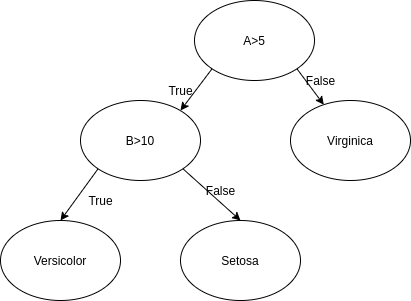
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [96]:
file=open("outputimp.txt","w")
tree_structure(root,file)
file.close()

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

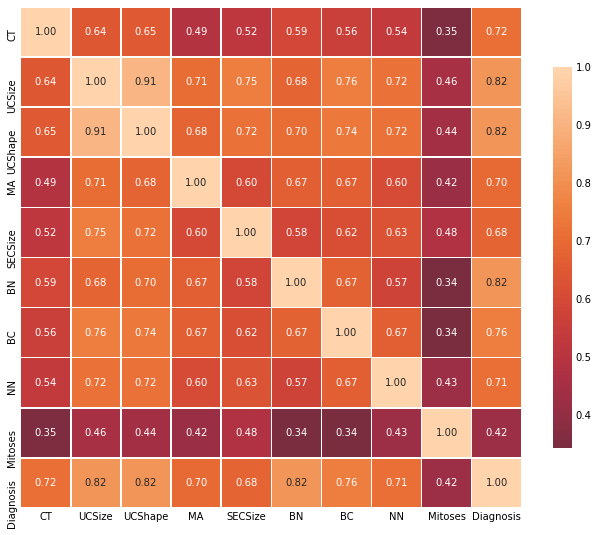

In [97]:
def correlation_heatmap(data):
    correlations = data.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data)

In [98]:
X = data.drop(['Diagnosis','CT','MA','SECSize','BC','NN','Mitoses'], axis = 1).values
Y = data['Diagnosis'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
dt = DTree()
root = dt.build_tree(X_train,Y_train,"gini")
Y_pred=predictval(root,X_test,0)
print("Accuracy = ",acc(Y_test,Y_pred))
print("we can observe that accuracy has been increased after dropping least correlated features")

Accuracy =  0.9857142857142858
we can observe that accuracy has been increased after dropping least correlated features


5. Report the advantages and disadvantages of decision trees based on the above question.